In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('honeyproduction.csv')
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [17]:
# 각 년도별 totalprod의 평균을 계산합니다
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [47]:
# 위 데이터프레임에서 year를 X변수에 저장합니다
X = prod_per_year['year']
# (15, ) 꼴의 데이터를 (15, 1)의 행렬로 변환시킨다
X = X.values.reshape(-1, 1)
print(X)
print(X.shape)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]
(15, 1)


In [49]:
# 위 데이터프레임에서 totalprod를 y변수에 저장합니다
y = prod_per_year['totalprod']
y = y.values.reshape(-1, 1)
print(y)
print(y.shape)

[[5105093.02325581]
 [4706674.41860465]
 [5106000.        ]
 [4221545.45454545]
 [3892386.36363636]
 [4122090.90909091]
 [4456804.87804878]
 [4243146.34146341]
 [3761902.43902439]
 [3600512.19512195]
 [3974926.82926829]
 [3626700.        ]
 [4382350.        ]
 [3680025.        ]
 [3522675.        ]]
(15, 1)


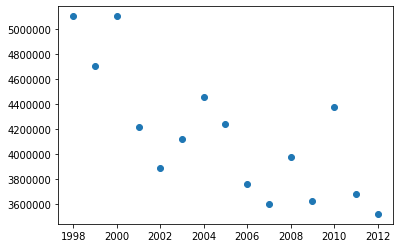

In [50]:
plt.plot(X, y, 'o')
plt.show()

In [55]:
# 선형 회귀 모델을 생성하고 fit 해봅시다
regr = LinearRegression()
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[[-88303.18915238]]
[1.81208083e+08]


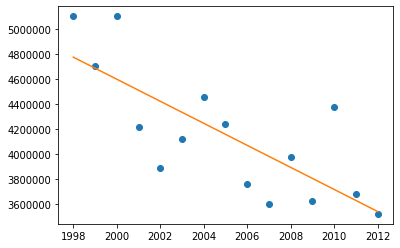

In [57]:
# 모델이 predict 한 값을 함께 그래프로 그려봅시다
y_predict = regr.predict(X)
plt.plot(X, y, 'o')
plt.plot(X, y_predict)
plt.show()

In [65]:
# 앞으로의 추이를 예측해보기 위해 연도 데이터를 더 생성해 봅시다
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
print(X_future[:10])

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]


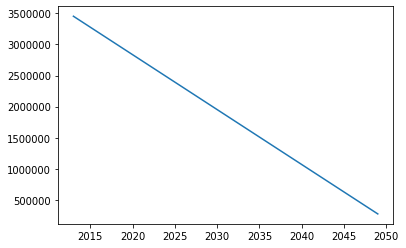

In [67]:
# 이제 앞으로의 연도별 totalprod를 예측해 봅시다
future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)
plt.show()